In [2]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
import results_daa
warnings.filterwarnings('ignore') # suppresses warnings that arise because original code uses ...
# ... deprecated tf version after first execution of cell 
res_filename = 'results_original'
datadict= results_daa.create_data()
for i in range(10):
    if i<10:  anneal = 0
    if i>=10: anneal = 1
    results_daa.collect_results(data = datadict,
                    into = res_filename, 
                    version = 'original', 
                    at_loss_factor=1.0, 
                    target_loss_factor=1.0,
                    recon_loss_factor=1.0,
                    kl_loss_factor=1.0,
                    anneal = anneal)


HERE ModuleSpec(name='_pywrap_tensorflow_internal', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x7f840689af98>, origin='/home/oehlers/.local/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so')
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.contrib.distributions`.
Instructions for updating:

epoch no 20 of 100
epoch no 40 of 100
epoch no 50 of 100
epoch no 80 of 100
epoch no 90 of 100
epoch no 100 of 100
Model Trained!
Tensorboard Path: /home/oehlers/Documents/arche_shared/Results/JAFFE/2020-04-10 01:52:00_1_2_50_100/Tensorboard
Saved Model Path: /home/oehlers/Documents/arche_shared/Results/JAFFE/2020-04-10 01:52:00_1_2_50_100/Saved_models


spaces: ['real space', 'reconstructed real space']
('luigi', 1.0, 1.0, 1.0, 1.0, 1, 9) real space <class 'numpy.ndarray'> (1000, 3) 0.0 1.0
spaces: ['real space', 'reconstructed real space']
('luigi', 1.0, 1.0, 1.0, 1.0, 1, 9) latent space <class 'numpy.ndarray'> (100000,) 0.968819685280323 0.968819685280323
spaces: ['real space', 'reconstructed real space']
('luigi', 1.0, 1.0, 1.0, 1.0, 1, 9) reconstructed real space <class 'numpy.ndarray'> (1000, 3) 0.09698637 0.95068574
spaces: ['real space', 'reconstructed real space']
('luigi', 1.0, 1.0, 1.0, 1.0, 1, 8) real space <class 'numpy.ndarray'> (1000, 3) 0.0 1.0
spaces: ['real space', 'reconstructed real space']
('luigi', 1.0, 1.0, 1.0, 1.0, 1, 8) latent space <class 'numpy.ndarray'> (100000,) 0.968819685280323 0.968819685280323
spaces: ['real space', 'reconstructed real space']
('luigi', 1.0, 1.0, 1.0, 1.0, 1, 8) reconstructed real space <class 'numpy.ndarray'> (1000, 3) 0.042800847 0.8986701
spaces: ['real space', 'reconstructed real s

spaces: ['real space', 'reconstructed real space']
('luigi', 1.0, 1.0, 1.0, 1.0, 0) reconstructed real space <class 'numpy.ndarray'> (1000, 3) 0.06901464 0.9651291


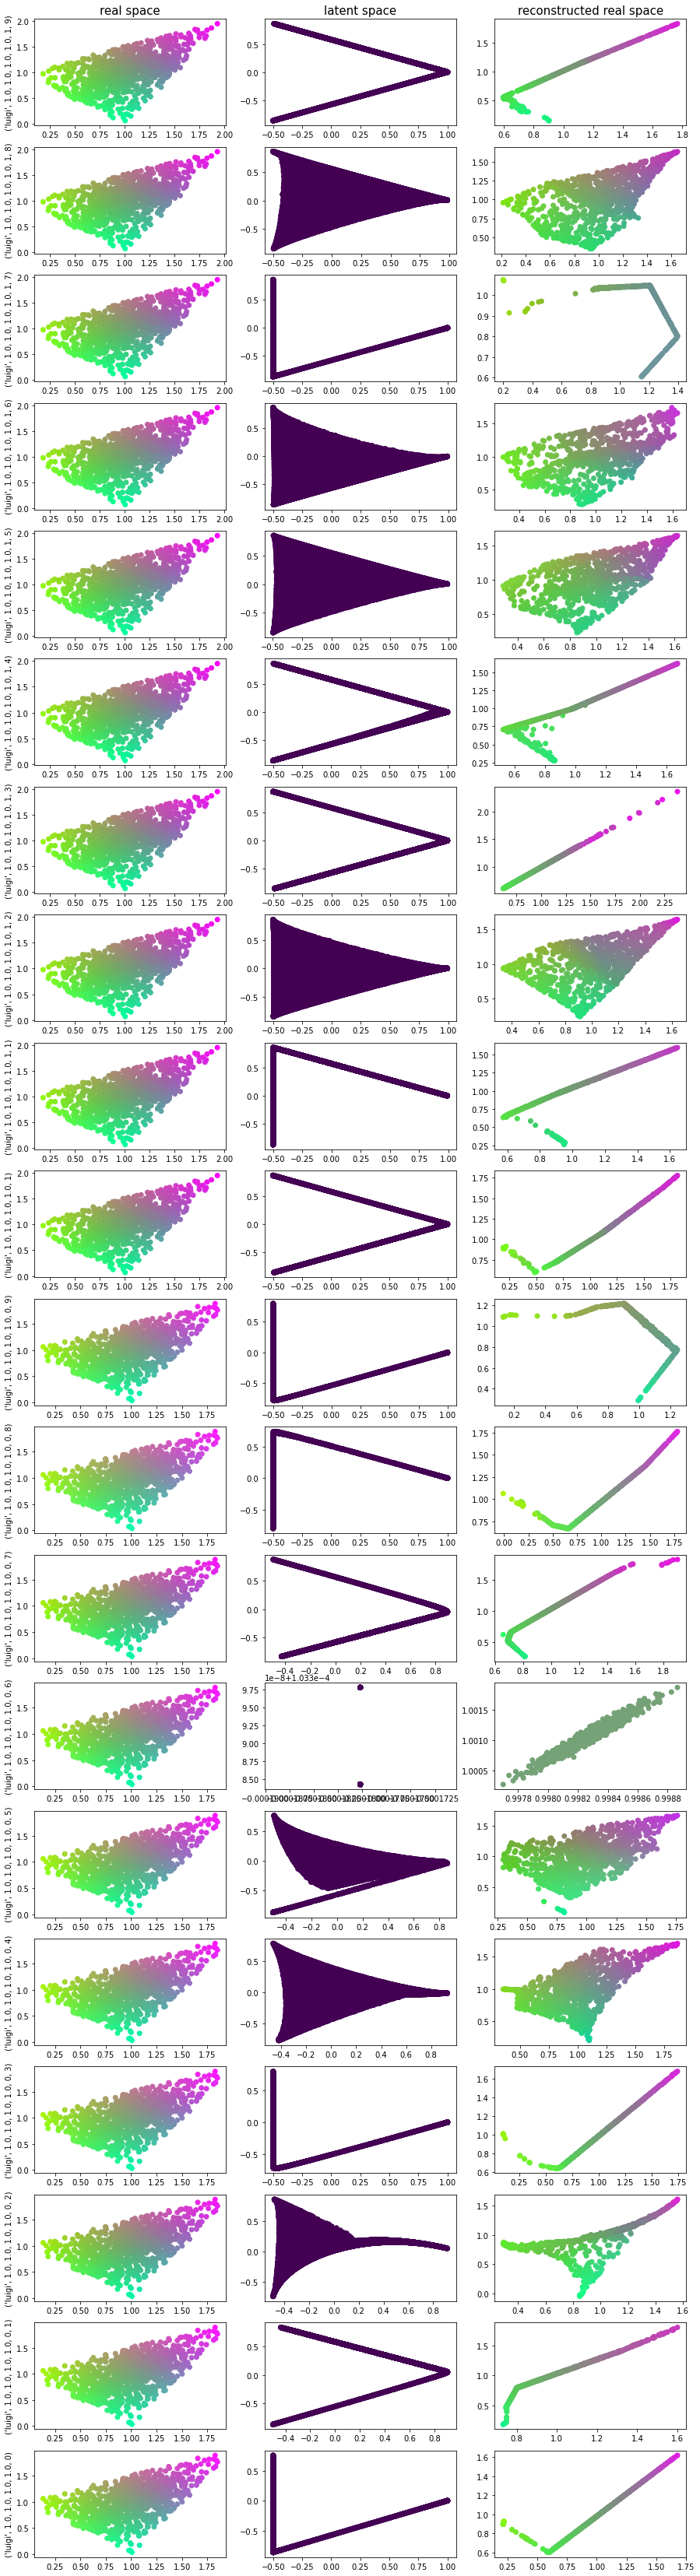

In [2]:
from collections import OrderedDict
import matplotlib.pyplot as plt
import numpy as np
import pickle
import warnings
import results_daa
#res_filename = 'results_luigi'
results_daa.plot_results(res_filename)

[[0. ]
 [0.8]
 [0.2]] [[2]] [[10]]


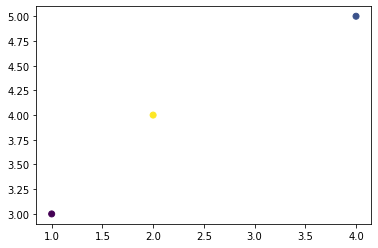

In [38]:

def rescale(a):
    """for instance, colors in rgb or list format:
    a = np.array([[9,4,3],[3,1,1],[15,0,2]])
    b = [2,10,4]"""
    c = np.array(a)
    if c.ndim==1: c = c.reshape((c.shape[-1],-1))
    cmin,cmax = np.array(c.min(axis=0)).reshape((-1,c.shape[1])), np.array(c.max(axis=0)).reshape((-1,c.shape[1]))
    c = (c-cmin)/cmax
    print(c,cmin,cmax)
    if c.ndim==1: c = c.reshape((c.shape[-1],-1))
    return c
c = rescale(b)
plt.scatter([1,2,4],[3,4,5],c=c)
plt.show()